In [1]:
#import necessary modules into python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import the raw data file
file = "WDIW Dataset.xlsx"
raw = pd.read_excel(file)
#reading the columns
print(raw.info())
# changing the column names in a shorter form
new_columns = ['Country Code', 'Country Name', 'Hult Region', 'Cool Name',
       'electricity total', 'electricity rural', 'electricity urban',
       'fertility 15-19', 'age dependency total', 'age dependency old',
       'age dependency young', 'agriculture %GDP', 'military % of work pop',
       'birth rate', 'birth skilled', 'death rate', 'PhD', 'bachelor',
       'master', 'lower secondary', 'post secondary', 'primary',
       'short-cycle tertiary', 'upper secondary', 'employment agriculture',
       'employment industry', 'employment service', 'fertility rate', 'GDP',
       'GDP growth', 'GINI index', 'education expenditure %',
       'income share fourth quantile', 'income share first quantile',
       'income share fifth quantile', 'income share second quantile',
       'income share third quantile', 'industry % GDP', 'life expectancy',
       'literacy adult', 'literacy young', 'trade % GDP', 'military % GDP',
       'mobile per 100', 'health poverty below $3.10', 'population 0-14',
       'population 15-64', 'population 65 above', 'population density',
       'population growth', 'pop largest city (% of urban pop)',
       'pop slums (% of urban pop)', 'pop female', 'pop male', 'pop total',
       'poverty $1.90 a day', 'poverty $3.20 a day', 'poverty ratio',
       'HIV rate', 'undernourishment %', 'underweight children under 5',
       'rural pop', 'service % GDP', 'surface area', 'tax revenue % GDP',
       'urban pop', 'urban pop growth']
#changed the name of the columns into shorter form
raw.columns = new_columns
#chscked the changes occured
print(raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 67 columns):
Country Code                                                                                                  217 non-null object
Country Name                                                                                                  217 non-null object
Hult Region                                                                                                   217 non-null object
Cool Name                                                                                                     217 non-null object
Access to electricity (% of population)                                                                       216 non-null float64
Access to electricity, rural (% of rural population)                                                          211 non-null float64
Access to electricity, urban (% of urban population)                                                          216

In [2]:
#adding additional columns into the data: GDP per capita
raw['GDP per capita'] = raw['GDP'] / raw['pop total']
#added social progress index
file2 = 'SPI.xlsx'
spi = pd.read_excel(file2)
# checking for possible errors in the file
spi['Country Name'].values # many countries have space in the end of the name
country_name = []
for country in spi['Country Name'].values:
    country_name.append(country.rstrip())
# check the country name without error
country_name
# replace the values
spi['Country Name'] = country_name
# merge the two data frames into one data frame
merge = pd.merge(raw, spi, how = 'left', on = 'Country Name')
file3 = 'WDI_Metadata.xlsx'
metadata = pd.ExcelFile(file3)
print(metadata.sheet_names)
country_data = metadata.parse('Country - Metadata')
country_income_region = country_data[['Country Code', 'Income Group', 'Region']]
country_income_region
merge2 = pd.merge(merge, country_income_region, on = 'Country Code', how = 'left')
merge2

['Series - Metadata', 'Country - Metadata', 'Country-Series - Metadata', 'Series-Time - Metadata', 'FootNote', 'Sheet1']


,Country Code,Country Name,Hult Region,Cool Name,electricity total,electricity rural,electricity urban,fertility 15-19,age dependency total,age dependency old,...,rural pop,service % GDP,surface area,tax revenue % GDP,urban pop,urban pop growth,GDP per capita,Score,Income Group,Region
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.700000,97.091973,99.500000,68.957000,86.000753,4.750925,...,74.750000,52.655431,6.528600e+05,9.250468,25.250000,3.463407,556.302139,35.66,Low income,South Asia
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.000000,100.000000,100.000000,19.642000,45.682097,19.418064,...,40.617000,47.965907,2.875000e+04,18.879748,59.383000,1.541285,4532.889198,70.97,Upper middle income,Europe & Central Asia
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.000000,100.000000,100.000000,10.071000,55.804001,9.624334,...,27.948000,45.615016,2.381740e+06,NaN,72.052000,2.871374,4048.285258,65.41,Upper middle income,Middle East & North Africa
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,12.830000,NaN,2.000000e+02,NaN,87.170000,-0.249256,11398.777418,NaN,Upper middle income,East Asia & Pacific
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,11.850000,79.285586,4.700000e+02,NaN,88.150000,-0.495265,39134.393371,NaN,High income,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,PSE,West Bank,Arabian Peninsula,Wheeljack,100.000000,100.000000,100.000000,52.766000,73.481011,5.367632,...,24.106000,NaN,6.020000e+03,6.386103,75.894000,2.339809,3254.485887,NaN,Lower middle income,Middle East & North Africa
213,WLD,World,World,Sentinel Prime,88.848638,78.647356,97.357692,42.455699,54.216831,13.216044,...,45.177758,65.035716,1.320366e+08,15.204328,54.822242,1.985135,10769.730295,NaN,NaN,NaN
214,YEM,Yemen,Arabian Peninsula,Wheeljack,79.200000,68.702845,97.848656,60.352000,74.987414,4.990006,...,63.984000,19.112768,5.279700e+05,NaN,36.016000,4.166123,963.494721,43.46,Low income,Middle East & North Africa
215,ZMB,Zambia,East/South Africa,Jazz,40.300000,13.997701,75.200000,120.112000,90.462311,3.970773,...,57.024000,52.093837,7.526100e+05,15.184871,42.976000,4.211349,1534.865371,NaN,Lower middle income,Sub-Saharan Africa


In [3]:
# filling in the missing values
# loading the dataset with missing values
# load excel file with multiple sheets
file4 = 'WDIW Dataset_v6.xlsx'
missing = pd.ExcelFile(file4)
print(missing.sheet_names)
# parsing births attended by skilled labor sheet and cleaning
births = missing.parse('births (skill labor)')
births.index = births['Unnamed: 0']
birth_2017 = dict(births[2017])
birth_2017 #checking
# parsing tax revenue by countries and cleaning
tax_revenue = missing.parse('tax revenue')
tax_revenue.index = tax_revenue['Unnamed: 0']
tax_revenue_2017 = dict(tax_revenue[2017])
tax_revenue_2017 #checking
# parsing adult literacy rate by countries and cleaning
literacy_rate = missing.parse('literacy rate (old)')
literacy_rate.index = literacy_rate['Unnamed: 0']
literacy_rate_2017 = dict(literacy_rate[2017])
literacy_rate_2017 #checking
# parsing poverty line $1.9 by countries and cleaning
poverty_19 = missing.parse(' poverty line $1.9')
poverty_19.index = poverty_19['Unnamed: 0']
poverty_19_2017 = dict(poverty_19[2017])
poverty_19_2017 #checking
# parsing Gini index by countries and cleaning
gini = missing.parse('Gini index')
gini.index = gini['Unnamed: 0']
gini_2017 = dict(gini[2017])
gini_2017 #checking
# parsing military expenditure by countries and cleaning
military = missing.parse('Military expenditure')
military.index = military['Unnamed: 0']
military_2017 = dict(military[2017])
military_2017 #checking
# parsing poverty line $3.2 by countries and cleaning
poverty_32 = missing.parse('poverty (3.20)')
poverty_32.index = poverty_32['Unnamed: 0']
poverty_32_2017 = dict(poverty_32[2017])
poverty_32_2017 #checking
# parsing education phd by countries and cleaning
education_phd = missing.parse('Education 1 Doctor')
education_phd.index = education_phd['Unnamed: 0']
education_phd_2017 = dict(education_phd[2017])
education_phd_2017 #checking
# parsing education bachelor by countries and cleaning
education_bac = missing.parse('Education 2 Bachelor')
education_bac.index = education_bac['Unnamed: 0']
education_bac_2017 = dict(education_bac[2017])
education_bac_2017 #checking
# parsing education masters by countries and cleaning
education_mas = missing.parse('Education 3 Master')
education_mas.index = education_mas['Unnamed: 0']
education_mas_2017 = dict(education_mas[2017])
education_mas_2017 #checking
# parsing education lower secondary by countries and cleaning
education_ls = missing.parse('Education 4 Lower Secondary')
education_ls.index = education_ls['Unnamed: 0']
education_ls_2017 = dict(education_ls[2017])
education_ls_2017 #checking
# parsing education post secondary by countries and cleaning
education_ps = missing.parse('Education 5 post secondary')
education_ps.index = education_ps['Unnamed: 0']
education_ps_2017 = dict(education_ps[2017])
education_ps_2017 #checking
# parsing education primary by countries and cleaning
education_pri = missing.parse('Education 6 Primary')
education_pri.index = education_pri['Unnamed: 0']
education_pri_2017 = dict(education_pri[2017])
education_pri_2017 #checking
# parsing education short tertiary by countries and cleaning
education_st = missing.parse('Education 7 short tertiary')
education_st.index = education_st['Unnamed: 0']
education_st_2017 = dict(education_st[2017])
education_st_2017 #checking
# parsing education upper secondary by countries and cleaning
education_us = missing.parse('Education 8 upper secondary')
education_us.index = education_us['Unnamed: 0']
education_us_2017 = dict(education_us[2017])
education_us_2017 #checking
# population of largest city
file5 = 'Biggest City.xlsx'
big_city = pd.read_excel(file5)
big_city.index = big_city['Unnamed: 0']
big_city_2017 = dict(big_city[2017])
big_city_2017 #checking
#income share per quantile
file6 = 'Income share held .xlsx'
income_share = pd.ExcelFile(file6)
print(income_share.sheet_names)
#parsing first quantile and extract values
first_quant = income_share.parse('First share ')
first_quant.index = first_quant['Unnamed: 0']
first_quant_2017 = dict(first_quant[2017])
first_quant_2017 #checking
#parsing second quantile and extract values
second_quant = income_share.parse('second share')
second_quant.index = second_quant['Unnamed: 0']
second_quant_2017 = dict(second_quant[2017])
second_quant_2017 #checking
#parsing third quantile and extract values
third_quant = income_share.parse('Third share')
third_quant.index = third_quant['Unnamed: 0']
third_quant_2017 = dict(third_quant[2017])
third_quant_2017 #checking
#parsing fourth quantile and extract values
fourth_quant = income_share.parse('Fourth share')
fourth_quant.index = fourth_quant['Unnamed: 0']
fourth_quant_2017 = dict(fourth_quant[2017])
fourth_quant_2017 #checking
#parsing fifth quantile and extract values
fifth_quant = income_share.parse('Fifth share')
fifth_quant.index = fifth_quant['Unnamed: 0']
fifth_quant_2017 = dict(fifth_quant[2017])
fifth_quant_2017 #checking
#educational expenditure spent by government expenss and extract values
file6 = 'Educational expenditure.xlsx'
educational_expenditure = pd.read_excel(file6)
educational_expenditure.index = educational_expenditure['Unnamed: 0']
educational_expenditure_2017 = dict(educational_expenditure[2017])
educational_expenditure_2017 #checking

['Raw_2', 'Raw', 'births (skill labor)', 'tax revenue', 'literacy rate (old)', ' poverty line $1.9', 'Gini index', 'Military expenditure', 'poverty (3.20)', 'Education 1 Doctor', 'Education 2 Bachelor', 'Education 3 Master', 'Education 4 Lower Secondary', 'Education 5 post secondary', 'Education 6 Primary', 'Education 7 short tertiary', 'Education 8 upper secondary']
['First share ', 'second share', 'Third share', 'Fourth share', 'Fifth share']


{'BGD': 18.388,
 'BTN': 24.040979385376,
 'CHN': nan,
 'IND': 11.83368,
 'KAZ': 11.4215002059937,
 'KGZ': 18.6443099975586,
 'MDV': 11.28612,
 'MNG': 13.4912204742432,
 'MMR': 10.1523303985596,
 'NPL': 15.746470451355,
 'LKA': 14.4997596740723,
 'TJK': 14.436335,
 'THA': 20.706585}

In [4]:
# Imputing the dictionary into the original data set using the key value pairs
for country in birth_2017.keys():
    merge2.loc[:, 'birth skilled'][merge2['Country Name'] == country] = birth_2017[country]
for country in tax_revenue_2017.keys():
    merge2.loc[:, 'tax revenue % GDP'][merge2['Country Name'] == country] = tax_revenue_2017[country]
for country in literacy_rate_2017.keys():
    merge2.loc[:, 'literacy adult'][merge2['Country Name'] == country] = literacy_rate_2017[country]
for country in poverty_19_2017.keys():
    merge2.loc[:, 'poverty $1.90 a day'][merge2['Country Name'] == country] = poverty_19_2017[country]
for country in gini_2017.keys():
    merge2.loc[:, 'GINI index'][merge2['Country Name'] == country] = gini_2017[country]
for country in military_2017.keys():
    merge2.loc[:, 'military % GDP'][merge2['Country Name'] == country] = military_2017[country]
for country in poverty_32_2017.keys():
    merge2.loc[:, 'poverty $3.20 a day'][merge2['Country Name'] == country] = poverty_32_2017[country]
for country in education_phd_2017.keys():
    merge2.loc[:, 'PhD'][merge2['Country Name'] == country] = education_phd_2017[country]
for country in education_bac_2017.keys():
    merge2.loc[:, 'bachelor'][merge2['Country Name'] == country] = education_bac_2017[country]
for country in education_mas_2017.keys():
    merge2.loc[:, 'master'][merge2['Country Name'] == country] = education_mas_2017[country]
for country in education_ls_2017.keys():
    merge2.loc[:, 'lower secondary'][merge2['Country Name'] == country] = education_ls_2017[country]
for country in education_ps_2017.keys():
    merge2.loc[:, 'post secondary'][merge2['Country Name'] == country] = education_ps_2017[country]
for country in education_pri_2017.keys():
    merge2.loc[:, 'primary'][merge2['Country Name'] == country] = education_pri_2017[country]
for country in education_st_2017.keys():
    merge2.loc[:, 'short-cycle tertiary'][merge2['Country Name'] == country] = education_st_2017[country]
for country in education_us_2017.keys():
    merge2.loc[:, 'upper secondary'][merge2['Country Name'] == country] = education_us_2017[country]
for country in big_city_2017.keys():
    merge2.loc[:, 'pop largest city (% of urban pop)'][merge2['Country Name'] == country] = big_city_2017[country]
for country in first_quant_2017.keys():
    merge2.loc[:, 'income share first quantile'][merge2['Country Code'] == country] = first_quant_2017[country]
for country in second_quant_2017.keys():
    merge2.loc[:, 'income share second quantile'][merge2['Country Code'] == country] = second_quant_2017[country]
for country in third_quant_2017.keys():
    merge2.loc[:, 'income share third quantile'][merge2['Country Code'] == country] = third_quant_2017[country]
for country in fifth_quant_2017.keys():
    merge2.loc[:, 'income share fifth quantile'][merge2['Country Code'] == country] = fifth_quant_2017[country]
for country in educational_expenditure_2017.keys():
    merge2.loc[:, 'education expenditure %'][merge2['Country Code'] == country] = educational_expenditure_2017[country]

C:\Users\dwkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dwkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dwkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Us

In [5]:
pd.options.display.max_columns = 75
# Single valueimputation
#Setted index as country name
merge2.index = merge2['Country Name']
#filtering by income group and region
lower_middle = merge2.loc[merge2['Income Group'] == 'Lower middle income']
south_asia_lower_middle = lower_middle.loc[lower_middle['Region'] == 'South Asia']
#Bhuthan group : lower middle income group in South Asia
#Bhuthan's military expenditure % of GDP imputation using the group's median value
bhutan_military = south_asia_lower_middle['military % GDP'].median()
merge2['military % GDP']['Bhutan'] = bhutan_military
#Bhuthan's military % of working population imputation using the group's median value
bhutan_military_personnel = south_asia_lower_middle['military % of work pop'].median()
merge2['military % of work pop']['Bhutan'] = bhutan_military_personnel
#Single value imputation using the values found on internet
merge2['HIV rate']['India'] = 0.2
merge2['GINI index']['India'] = 47.9
merge2['GINI index']['Nepal'] = 38.9

C:\Users\dwkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dwkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dwkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\dwkan

In [6]:
#Finalize and share the file
merge2.to_excel('WDIW Dataset_v8.xlsx')
#team country sliced
dinobots = merge2.loc[merge2['Cool Name'] == 'Dinobots']

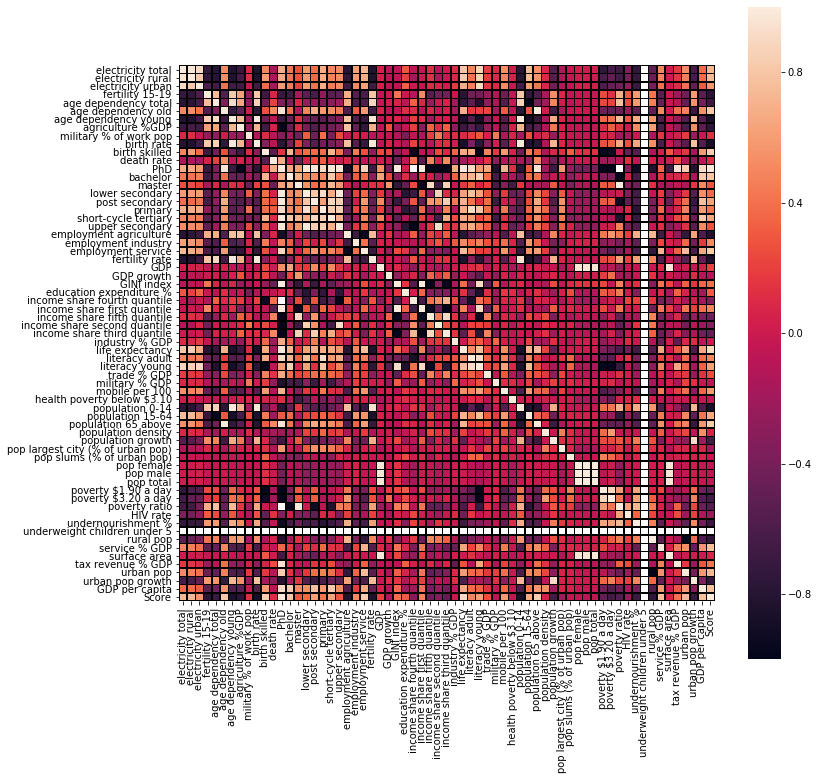

C:\Users\dwkan\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [7]:
corr = merge2.corr() 
# make the heat map of the world parameters
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            square  = True,
            annot   = False,
            linecolor = 'black',
            linewidths = 0.5,
            xticklabels = corr.columns,
            yticklabels = corr.columns)

#reconfigure the plot
bottom, top = plt.ylim()
bottom += 0.5
top -= 0.5
plt.ylim(bottom, top)

# show the heat map
plt.show()

# produce an excel file with the heatmap in the folder of your code
# 'coolwarm' is the color scheme
(corr.style.background_gradient(cmap='coolwarm')
           .to_excel("world_heatmap.xlsx", engine="openpyxl"))

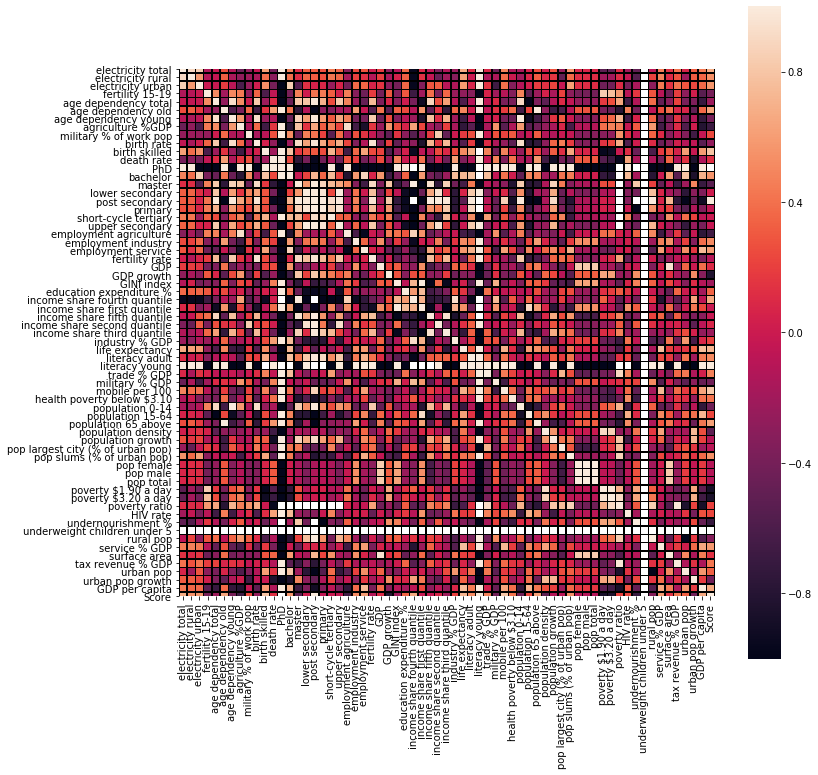

In [8]:
corr_dino = dinobots.corr()

# make the heat map of dinobots group parameters
plt.figure(figsize = (12, 12))
sns.heatmap(corr_dino,
            square  = True,
            annot   = False,
            linecolor = 'black',
            linewidths = 0.5,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

# show the heat map
plt.show()

# produce an excel file with the heatmap in the folder of your code
# 'coolwarm' is the color scheme
(corr_dino.style.background_gradient(cmap='coolwarm')
           .to_excel("dino_heatmap.xlsx", engine="openpyxl"))

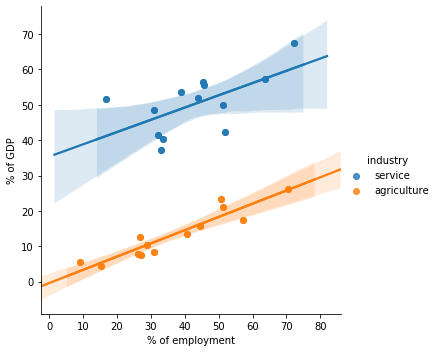

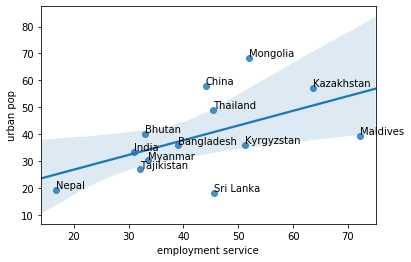

In [9]:
# Comparing agriculture and service and its contribution to the GDP on the same graph
service = dinobots[['employment service', 'service % GDP']].reset_index()
agriculture = dinobots[['employment agriculture', 'agriculture %GDP']].reset_index()
df = pd.concat([service.rename(columns ={'employment service':'% of employment', 'service % GDP':'% of GDP'})
                .join(pd.Series(['service']*len(service), name='industry')),
                agriculture.rename(columns={'employment agriculture':'% of employment','agriculture %GDP':'% of GDP'})          
                .join(pd.Series(['agriculture']*len(agriculture), name='industry'))],
               ignore_index = True)

g = sns.FacetGrid(df, hue = 'industry', height=5)
g.map(sns.regplot, "% of employment", "% of GDP")
g.map(sns.regplot, "% of employment", "% of GDP")
g.add_legend()
plt.savefig('employment type.png')
plt.show()
# urban population and the employment in service have positive correlation
urban_service = sns.regplot(x = 'employment service', y = 'urban pop', data = dinobots, fit_reg = True)
for line in range(0,dinobots.shape[0]):
     urban_service.text(dinobots['employment service'][line],
                        dinobots['urban pop'][line]+0.5,
                        dinobots['Country Name'][line], 
                        horizontalalignment='left', 
                        size= 10, 
                        color='black')
plt.show()

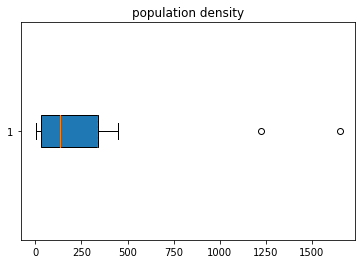

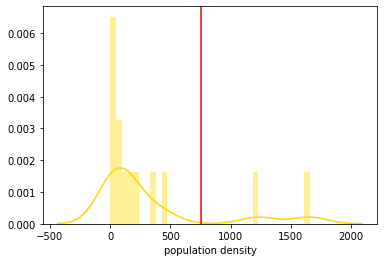

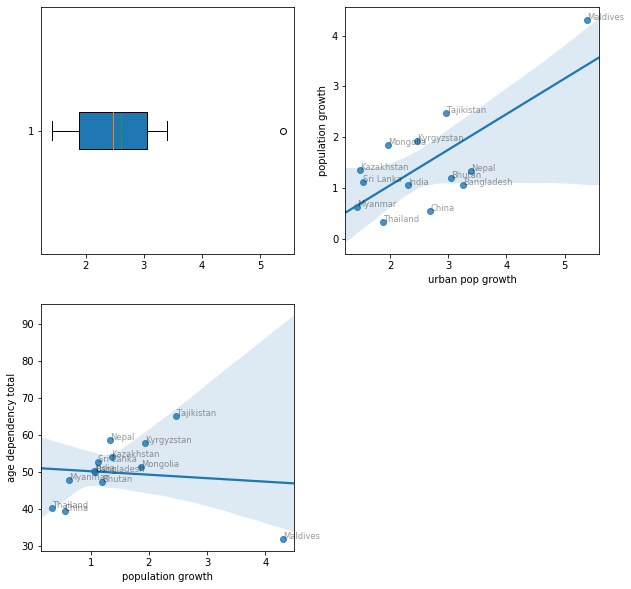

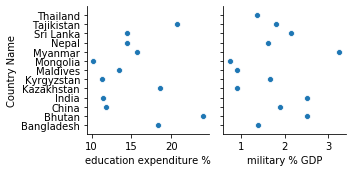

In [18]:
# Fiding outliers in population density 
plt.boxplot(x            = 'population density',
            data         = dinobots,
            vert         = False,
            patch_artist = True,
            meanline     = True,
            showmeans    = True)
plt.title('population density')
# show your plot
plt.savefig('outlierbox.png')
plt.show()
sns.distplot(dinobots['population density'],
            bins= 35,
            color='gold')
pop_hi_dens=750
# Threshhold of outlier as 750
plt.axvline(pop_hi_dens, color= 'r')
plt.savefig('outlier.png')
plt.show()
# Box plot on urban population growth
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.boxplot(x            = 'urban pop growth',
            data         = dinobots,           
            vert         = False,
            patch_artist = True,
            meanline     = True,
            showmeans    = True)
# Regression plot on urban population growth against population growth
plt.subplot(2,2,2)
dinobots_lifeexp= sns.regplot(x = 'urban pop growth', y = 'population growth', data = dinobots, fit_reg = True)
for line in range(0,dinobots.shape[0]):
     dinobots_lifeexp.text(dinobots['urban pop growth'][line],
                               dinobots['population growth'][line],
                               dinobots['Country Name'][line], 
                               horizontalalignment='left', 
                               size='small',
                               alpha= 0.4,
                               color='black')

# Regression plot on population growth and age dependency rate
plt.subplot(2,2,3)
dino_myanmar=sns.regplot(x = 'population growth', y = 'age dependency total', data = dinobots, fit_reg = True)
for line in range(0,dinobots.shape[0]):
     dino_myanmar.text(dinobots['population growth'][line],
                               dinobots['age dependency total'][line],
                               dinobots['Country Name'][line], 
                               horizontalalignment='left', 
                               size='small',
                               alpha= 0.4,
                               color='black')
plt.show()
# pairplot on education expenditure and military expenditure
sns.pairplot(data = dinobots,
             x_vars = ['education expenditure %', 'military % GDP'],
             y_vars = ['Country Name'],
             palette = 'plasma')
# Make your plot tighter 
plt.tight_layout()
plt.savefig('Myanmar.png')
plt.show()

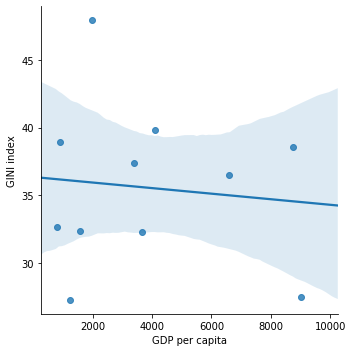

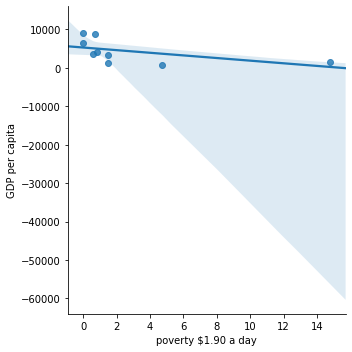

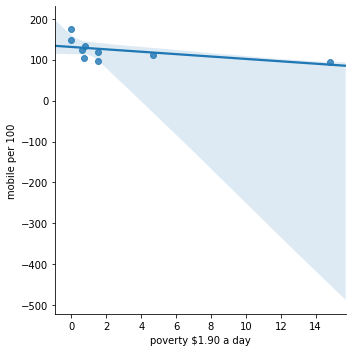

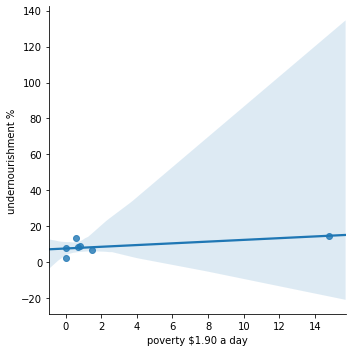

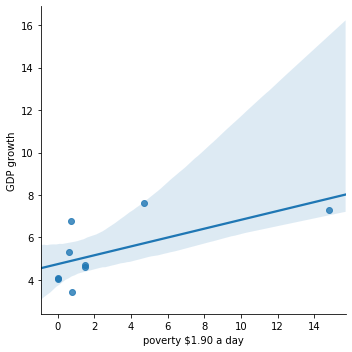

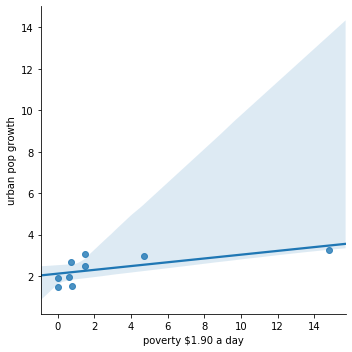

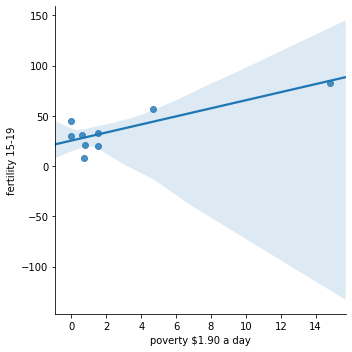

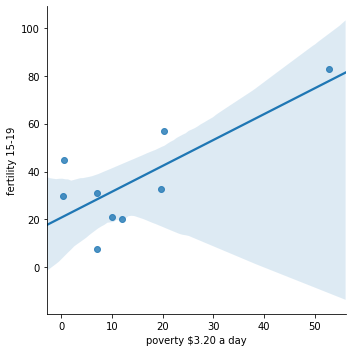

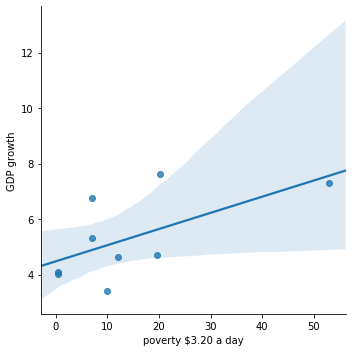

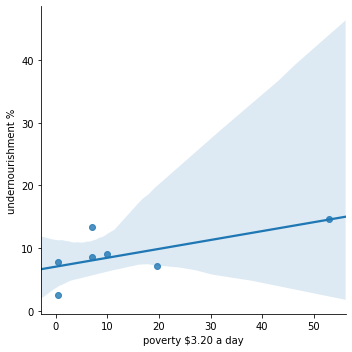

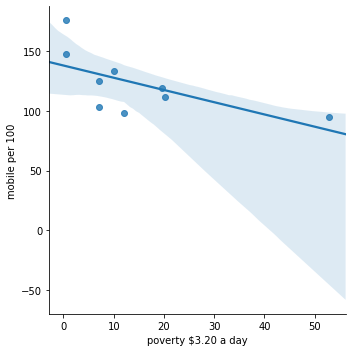

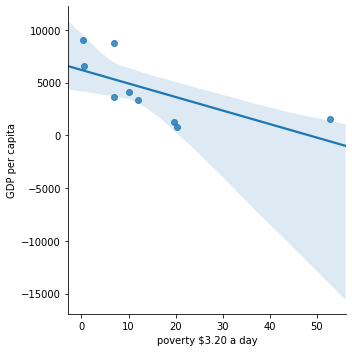

In [11]:
# Comparing poverty ratio with the different parameters
sns.lmplot(x = 'GDP per capita', y = 'GINI index', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $1.90 a day', y = 'GDP per capita', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $1.90 a day', y = 'mobile per 100', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $1.90 a day', y = 'undernourishment %', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $1.90 a day', y = 'GDP growth', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $1.90 a day', y = 'urban pop growth', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $1.90 a day', y = 'fertility 15-19', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $3.20 a day', y = 'fertility 15-19', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $3.20 a day', y = 'GDP growth', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $3.20 a day', y = 'undernourishment %', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $3.20 a day', y = 'mobile per 100', data = dinobots, fit_reg = True)
sns.lmplot(x = 'poverty $3.20 a day', y = 'GDP per capita', data = dinobots, fit_reg = True)
plt.show()

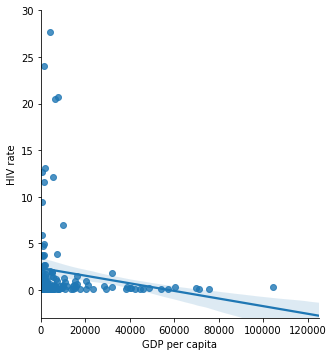

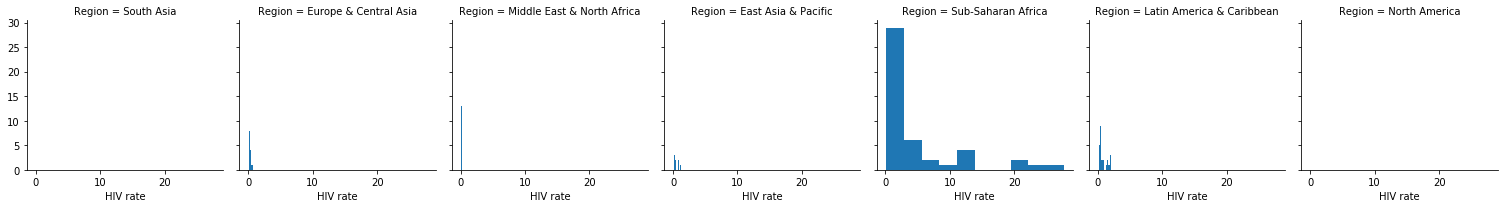

In [12]:
#Comparing the HIV rate with GDP per capita
sns.lmplot(x = 'GDP per capita', y = 'HIV rate', data = merge2, fit_reg = True)
plt.ylim(-3, 30)
plt.xlim(0,125000)
plt.show()
#facet grid is making empty graph spaces

dist = sns.FacetGrid(merge2, col = "Region")

#say what kind of plot you want and which parameter
dist.map(plt.hist, "HIV rate")

#save the file
plt.savefig('HIV Rate.png')

#show the plot
plt.show()
# Other than Sub-Saharan Africa region HIV rate is very low (around 1 per 1000)

C:\Users\dwkan\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


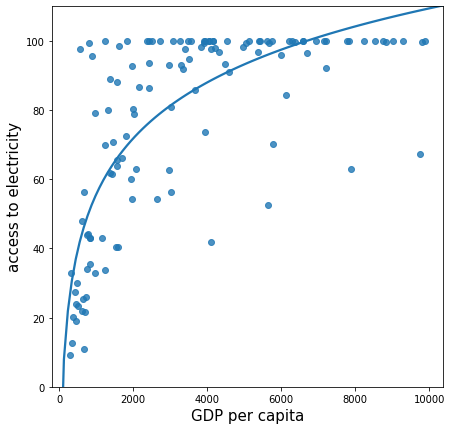

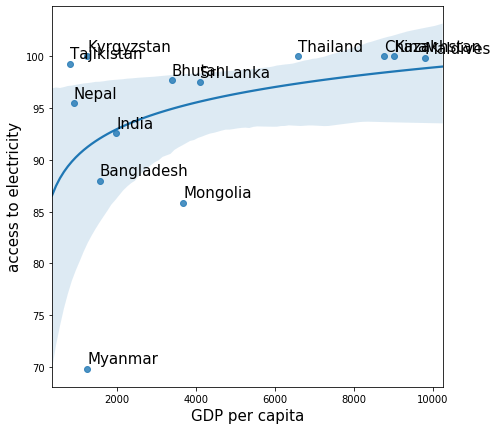

In [13]:
# access to electricity ananlysis target group of GDP per capita lower than 10000 
target_group = merge2.loc[merge2['GDP per capita'] < 10000]
# Access to electricity and GDP per capita of targeted group(GDP per capita below 10000)
plt.figure(figsize = (7, 7))
below_10000 = sns.regplot(x = 'GDP per capita', y = 'electricity total', data = target_group, logx = True, ci = False)
plt.ylim(0,110)
plt.ylabel('access to electricity',size = 15)
plt.xlabel('GDP per capita', size = 15)
plt.savefig('electricity access below 10000.png')
plt.show()
plt.figure(figsize = (7, 7))
# Countries under Dinobots access to electricity and 
dinobots_electricity = sns.regplot(x = 'GDP per capita', y = 'electricity total', data = dinobots, logx = True)
for line in range(0,dinobots.shape[0]):
     dinobots_electricity.text(dinobots['GDP per capita'][line],
                               dinobots['electricity total'][line]+0.5,
                               dinobots['Country Name'][line], 
                               horizontalalignment='left', 
                               size= 15, 
                               color='black')
plt.ylabel('access to electricity',size = 15)
plt.xlabel('GDP per capita', size = 15)
plt.savefig('labeling countries.png')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


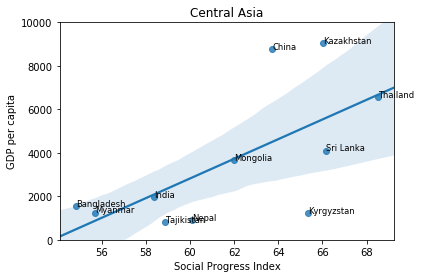

In [14]:
dinobots_score = sns.regplot(x = 'Score', y = 'GDP per capita', data = dinobots)
for line in range(0,dinobots.shape[0]):
     dinobots_score.text(dinobots['Score'][line],
                         dinobots['GDP per capita'][line],
                         dinobots['Country Name'][line], 
                         horizontalalignment='left', 
                         size='small', 
                         color='black')
plt.title('Central Asia')
plt.xlabel('Social Progress Index')
plt.ylabel('GDP per capita')
plt.ylim(0, 10000)
plt.show()

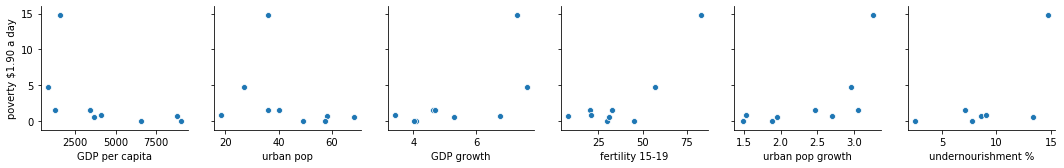

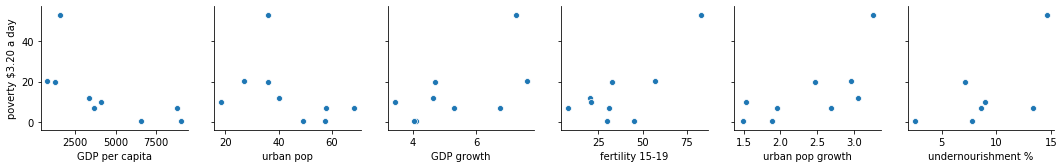

In [15]:
# Finding relationship with poverty
sns.pairplot(data = dinobots,
             x_vars = ['GDP per capita', 'urban pop','GDP growth','fertility 15-19','urban pop growth','undernourishment %'],
             y_vars = ['poverty $1.90 a day'],
             palette = 'plasma')
plt.show()
sns.pairplot(data = dinobots,
             x_vars = ['GDP per capita', 'urban pop','GDP growth','fertility 15-19','urban pop growth','undernourishment %'],
             y_vars = ['poverty $3.20 a day'],
             palette = 'plasma')
plt.savefig('poverty below 3.2.png')
plt.show()

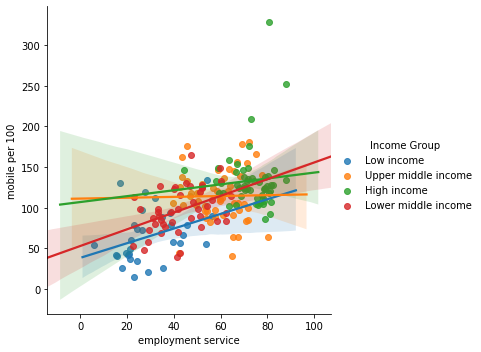

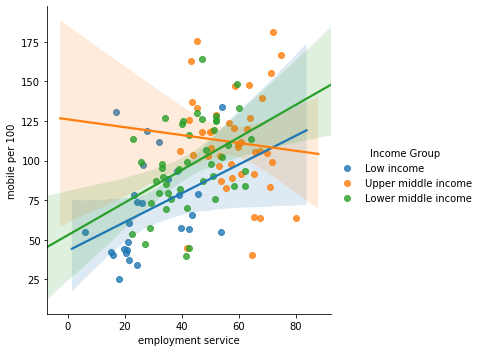

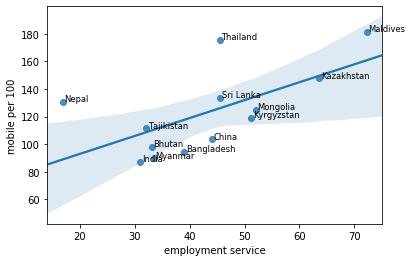

In [17]:
sns.lmplot(x = 'employment service', y = 'mobile per 100', data = merge2, hue = 'Income Group')
sns.lmplot(x = 'employment service', y = 'mobile per 100', data = target_group, hue = 'Income Group')
plt.show()
plt.clf()
dinobots_mobile = sns.regplot(x = 'employment service', y = 'mobile per 100', data = dinobots)
for line in range(0,dinobots.shape[0]):
     dinobots_mobile.text(dinobots['employment service'][line]+0.3,
                               dinobots['mobile per 100'][line]+0.2,
                               dinobots['Country Name'][line], 
                               horizontalalignment='left', 
                               size='small', 
                               color='black')
plt.show()